In [53]:
from IPython.display import HTML

HTML('''<script>
code_show=true;
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
}
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# this allows plots to appear directly in the notebook
%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14
# pip install patsy
# pip install statsmodels
import statsmodels.formula.api as smf
# Set ipython's max row display
pd.set_option('display.max_row', 1000)

# Set iPython's max column width to 50
pd.set_option('display.max_columns', 50)

from IPython.core.display import display, HTML

In [55]:
# define url
url_0420 = '/Users/shaokuixing/Desktop/whatever/survey50%GenderAge20160420.csv'

# read csv file
rawData = pd.read_csv(url_0420, sep=';', thousands = '.', decimal =',')

In [56]:
# subset recall
recall = rawData[rawData['questionid']==84].reset_index()
recall['recall'] = np.where(recall['ioptiontext']=='Yes',1,0).astype(int)
recall['recall_category'] = np.where(recall['ioptiontext']=='Yes','Yes','No')

# subset interest
interest = rawData[rawData['questionid']==86].reset_index()
interest['interest'] = pd.to_numeric(interest['ioptiontext'], errors='coerce')
interest['interest_category']=np.where(interest['interest']>= 4,'High','Low')

# subset intent
intent = rawData[rawData['questionid']==83].reset_index()
intent['intent'] = pd.to_numeric(intent['ioptiontext'], errors='coerce')
intent['intent_category']=np.where(intent['intent'] >= 4 ,'High','Low')

# subset age
age = rawData[rawData['questionid']==90].reset_index()
age=age.rename(columns = {'ioptiontext':'age_category'})

# subset gender
gender = rawData[rawData['questionid']==91].reset_index()
gender=gender.rename(columns = {'ioptiontext':'gender_category'})

In [57]:
#intent[intent['intent_category'] == 0]
# df.sort(['c1','c2'], ascending=[False,True])
#interest.sort(['answersetid'], ascending=True).head()
#interest.sort_values(by="answersetid").sample(n=5, random_state=1)

In [58]:
# drop unnecessary columns
recall.drop(recall[['ioptiontext','answerid','questionid','questiontext','optionid', 
                 'iscomplete','isrefgroup']],axis=1, inplace=True)
interest.drop(interest[['ioptiontext','answerid','questionid','questiontext','optionid', 
                 'iscomplete','isrefgroup']],axis=1, inplace=True)
intent.drop(intent[['ioptiontext','answerid','questionid','questiontext','optionid', 
              'iscomplete','isrefgroup']],axis=1, inplace=True)
age.drop(age[['answerid','questionid','questiontext','optionid','iscomplete','isrefgroup']],axis=1, inplace=True)
gender.drop(gender[['answerid','questionid','questiontext','optionid','iscomplete','isrefgroup']],axis=1, inplace=True)
#recall.head(1)
age.head()

,index,surveyid,answersetid,age_category,click,firstinteraction,deliveredimp,viewableimp,viewableimp_ic,totalviewtime
0,3,291,218047,15-24,0,0,4,3,2,9158
1,8,291,218979,35-44,0,0,2,1,1,1056
2,13,291,219322,25-34,0,0,1,0,0,NaN
3,18,291,219343,15-24,0,0,1,1,1,6220
4,23,291,219622,15-24,0,0,4,4,2,67354


In [59]:
# merge data
df = recall.merge(interest, 
on= ['surveyid','answersetid',  'click', 
     'firstinteraction', 'deliveredimp', 'viewableimp','viewableimp_ic','totalviewtime']).merge(intent, on= ['surveyid','answersetid',  'click', 
     'firstinteraction', 'deliveredimp', 'viewableimp','viewableimp_ic','totalviewtime']).merge(age, on= ['surveyid','answersetid',  'click', 
     'firstinteraction', 'deliveredimp', 'viewableimp','viewableimp_ic','totalviewtime']).merge(gender, on= ['surveyid','answersetid',  'click', 
     'firstinteraction', 'deliveredimp', 'viewableimp','viewableimp_ic','totalviewtime'])
df.isnull().any()



index_x              False
surveyid             False
answersetid          False
click                False
firstinteraction     False
deliveredimp         False
viewableimp          False
viewableimp_ic       False
totalviewtime         True
recall               False
recall_category      False
index_y              False
interest             False
interest_category    False
index_x              False
intent               False
intent_category      False
index_y              False
age_category         False
index                False
gender_category      False
dtype: bool

In [60]:
# create function to transform age column into numerical
def age_trans(x):
    if x['age_category'] == "15-24":
        val = 1
    elif x['age_category'] == "25-34":
        val = 2
    elif x['age_category'] == "35-44":
        val = 3
    elif x['age_category'] == "45-54":
        val = 4
    elif x['age_category'] == "55-64":
        val = 5
    else:
        val=6
    return val

# apply function and create numerical representation for age categories
df['age'] = df.apply(age_trans, axis=1)

In [61]:
# transform gender into numerical column
df['gender'] = np.where(df['gender_category']=="Male", 1, 0)

In [62]:
# reorder columns
df1= df[['answersetid', 'recall','interest','intent','age', 'gender','recall_category','interest_category', 
         'intent_category', 'age_category','gender_category',
         'click','firstinteraction','deliveredimp', 'viewableimp', 'viewableimp_ic','totalviewtime']]
df1.head()

,answersetid,recall,interest,intent,age,gender,recall_category,interest_category,intent_category,age_category,gender_category,click,firstinteraction,deliveredimp,viewableimp,viewableimp_ic,totalviewtime
0,218047,1,2,5,1,0,Yes,Low,High,15-24,Female,0,0,4,3,2,9158
1,218979,1,2,2,3,0,Yes,Low,Low,35-44,Female,0,0,2,1,1,1056
2,219322,0,2,2,2,0,No,Low,Low,25-34,Female,0,0,1,0,0,NaN
3,219343,1,3,4,1,0,Yes,Low,High,15-24,Female,0,0,1,1,1,6220
4,219622,1,1,3,1,0,Yes,Low,Low,15-24,Female,0,0,4,4,2,67354


In [63]:
df1[df1['totalviewtime'] == 0].count()

answersetid          16
recall               16
interest             16
intent               16
age                  16
gender               16
recall_category      16
interest_category    16
intent_category      16
age_category         16
gender_category      16
click                16
firstinteraction     16
deliveredimp         16
viewableimp          16
viewableimp_ic       16
totalviewtime        16
dtype: int64

In [64]:
# calculate average view time
#df1.is_copy = False
#df1['avgviewtime'] = df1['totalviewtime'].div(df['viewableimp_ic'], axis=0)
df1.isnull().any()


answersetid          False
recall               False
interest             False
intent               False
age                  False
gender               False
recall_category      False
interest_category    False
intent_category      False
age_category         False
gender_category      False
click                False
firstinteraction     False
deliveredimp         False
viewableimp          False
viewableimp_ic       False
totalviewtime         True
dtype: bool

In [65]:
df2=df1.copy()
df2.is_copy = False
df2['avgviewtime'] = df2['totalviewtime'].div(df2['viewableimp_ic'], axis=0)
df2.isnull().any()


answersetid          False
recall               False
interest             False
intent               False
age                  False
gender               False
recall_category      False
interest_category    False
intent_category      False
age_category         False
gender_category      False
click                False
firstinteraction     False
deliveredimp         False
viewableimp          False
viewableimp_ic       False
totalviewtime         True
avgviewtime           True
dtype: bool

In [66]:
# make sure no primary key is 0
np.isinf(df2.answersetid).any()

False

In [67]:
# count how many rows are 0
df2[df2['totalviewtime']==0]['answersetid'].nunique()

16

In [68]:
# count how many rows are null
# df.isnull().any().any()
df2.totalviewtime.isnull().values.sum()

427

In [69]:
# let's look at all the null value rows
# df2[df2.isnull().any(axis=1)]
df2.head()

,answersetid,recall,interest,intent,age,gender,recall_category,interest_category,intent_category,age_category,gender_category,click,firstinteraction,deliveredimp,viewableimp,viewableimp_ic,totalviewtime,avgviewtime
0,218047,1,2,5,1,0,Yes,Low,High,15-24,Female,0,0,4,3,2,9158,4579
1,218979,1,2,2,3,0,Yes,Low,Low,35-44,Female,0,0,2,1,1,1056,1056
2,219322,0,2,2,2,0,No,Low,Low,25-34,Female,0,0,1,0,0,NaN,NaN
3,219343,1,3,4,1,0,Yes,Low,High,15-24,Female,0,0,1,1,1,6220,6220
4,219622,1,1,3,1,0,Yes,Low,Low,15-24,Female,0,0,4,4,2,67354,33677


In [70]:
df3 = df2.copy()
df3.head()

,answersetid,recall,interest,intent,age,gender,recall_category,interest_category,intent_category,age_category,gender_category,click,firstinteraction,deliveredimp,viewableimp,viewableimp_ic,totalviewtime,avgviewtime
0,218047,1,2,5,1,0,Yes,Low,High,15-24,Female,0,0,4,3,2,9158,4579
1,218979,1,2,2,3,0,Yes,Low,Low,35-44,Female,0,0,2,1,1,1056,1056
2,219322,0,2,2,2,0,No,Low,Low,25-34,Female,0,0,1,0,0,NaN,NaN
3,219343,1,3,4,1,0,Yes,Low,High,15-24,Female,0,0,1,1,1,6220,6220
4,219622,1,1,3,1,0,Yes,Low,Low,15-24,Female,0,0,4,4,2,67354,33677


In [71]:
df3['totalviewtime'].fillna(0, inplace=True)
df3['avgviewtime']=df3.avgviewtime.replace(np.inf, np.nan)
df3['avgviewtime'].fillna(0, inplace=True)
df3.head()

,answersetid,recall,interest,intent,age,gender,recall_category,interest_category,intent_category,age_category,gender_category,click,firstinteraction,deliveredimp,viewableimp,viewableimp_ic,totalviewtime,avgviewtime
0,218047,1,2,5,1,0,Yes,Low,High,15-24,Female,0,0,4,3,2,9158,4579
1,218979,1,2,2,3,0,Yes,Low,Low,35-44,Female,0,0,2,1,1,1056,1056
2,219322,0,2,2,2,0,No,Low,Low,25-34,Female,0,0,1,0,0,0,0
3,219343,1,3,4,1,0,Yes,Low,High,15-24,Female,0,0,1,1,1,6220,6220
4,219622,1,1,3,1,0,Yes,Low,Low,15-24,Female,0,0,4,4,2,67354,33677


In [72]:
df3[np.isinf(df3.avgviewtime)==True]

,answersetid,recall,interest,intent,age,gender,recall_category,interest_category,intent_category,age_category,gender_category,click,firstinteraction,deliveredimp,viewableimp,viewableimp_ic,totalviewtime,avgviewtime


In [73]:
# check how many inf value
np.isinf(df3.avgviewtime).any()

False

In [74]:
# count how many rows are 0
df3[df3['avgviewtime']==0]['answersetid'].nunique()

567

In [75]:
# check if any other value is converted to 0
df3[df3['answersetid']==0]['answersetid'].nunique()

0

In [76]:
# count how many rows are null
# df.isnull().any().any()
df3.avgviewtime.isnull().values.sum()

0

,recall,interest,intent,age,gender,click,firstinteraction,deliveredimp,viewableimp,viewableimp_ic,totalviewtime
recall,1.000000,0.276274,0.194382,-0.145368,-0.003949,0.077391,0.101428,0.047495,0.039394,0.040944,0.037873
interest,0.276274,1.000000,0.456344,-0.065461,-0.074544,-0.003536,0.020329,-0.011893,-0.030027,-0.026786,0.016550
intent,0.194382,0.456344,1.000000,-0.009046,-0.085352,0.007248,-0.001838,-0.015161,-0.030897,-0.028275,-0.008655
age,-0.145368,-0.065461,-0.009046,1.000000,0.000903,0.030194,-0.029028,0.021193,0.033492,0.027608,0.026381
gender,-0.003949,-0.074544,-0.085352,0.000903,1.000000,0.054697,0.075466,-0.014405,0.007542,0.008829,0.061262
click,0.077391,-0.003536,0.007248,0.030194,0.054697,1.000000,0.593325,0.267717,0.280040,0.284497,0.253445
firstinteraction,0.101428,0.020329,-0.001838,-0.029028,0.075466,0.593325,1.000000,0.319089,0.327225,0.333056,0.388255
deliveredimp,0.047495,-0.011893,-0.015161,0.021193,-0.014405,0.267717,0.319089,1.000000,0.847223,0.828288,0.515742
viewableimp,0.039394,-0.030027,-0.030897,0.033492,0.007542,0.280040,0.327225,0.847223,1.000000,0.951936,0.557504
viewableimp_ic,0.040944,-0.026786,-0.028275,0.027608,0.008829,0.284497,0.333056,0.828288,0.951936,1.000000,0.571289


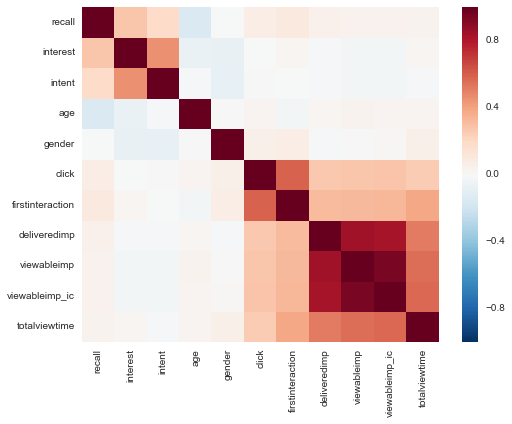

In [77]:
sns.heatmap(df1[df1.columns[1:]].corr(method='kendall'))
df1[df1.columns[1:]].corr(method='kendall')

In [78]:
#df3['avgviewtime'] = df3['avgviewtime']/1000
#df3['totalviewtime'] = df3['totalviewtime']/1000
df3[df3.columns[1:]].describe()

,recall,interest,intent,age,gender,click,firstinteraction,deliveredimp,viewableimp,viewableimp_ic,totalviewtime,avgviewtime
count,8004.000000,8004.000000,8004.000000,8004.000000,8004.000000,8004.000000,8004.000000,8004.000000,8004.000000,8004.000000,8.004000e+03,8004.000000
mean,0.387306,2.342954,2.517366,2.642804,0.432784,0.274113,0.790855,30.411169,21.035357,18.542854,1.184217e+06,81155.705736
std,0.487165,1.248545,1.393860,1.564386,0.495492,0.932737,4.858306,56.383385,39.026577,33.238753,9.269530e+06,549079.473805
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,4.000000,2.000000,2.000000,2.682750e+04,6044.416667
50%,0.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,12.000000,8.000000,8.000000,1.243460e+05,11248.093750
75%,1.000000,3.000000,3.000000,4.000000,1.000000,0.000000,1.000000,33.000000,23.000000,21.000000,4.815480e+05,30811.250000
max,1.000000,5.000000,5.000000,6.000000,1.000000,27.000000,393.000000,1026.000000,760.000000,680.000000,6.911309e+08,36375309.368421


In [80]:
df4=df3.copy()

In [81]:
#categorical cut on avgviewtime
labels = [ "{0} - {1}".format(i, i + 2) for i in range(0, 120, 2) ]
print labels
df4['avgVTCategory'] = pd.cut(df4.avgviewtime, range(0, 121, 2), right=False, labels=labels)
df4[['avgviewtime','avgVTCategory']].sample(n=20, random_state=0)

['0 - 2', '2 - 4', '4 - 6', '6 - 8', '8 - 10', '10 - 12', '12 - 14', '14 - 16', '16 - 18', '18 - 20', '20 - 22', '22 - 24', '24 - 26', '26 - 28', '28 - 30', '30 - 32', '32 - 34', '34 - 36', '36 - 38', '38 - 40', '40 - 42', '42 - 44', '44 - 46', '46 - 48', '48 - 50', '50 - 52', '52 - 54', '54 - 56', '56 - 58', '58 - 60', '60 - 62', '62 - 64', '64 - 66', '66 - 68', '68 - 70', '70 - 72', '72 - 74', '74 - 76', '76 - 78', '78 - 80', '80 - 82', '82 - 84', '84 - 86', '86 - 88', '88 - 90', '90 - 92', '92 - 94', '94 - 96', '96 - 98', '98 - 100', '100 - 102', '102 - 104', '104 - 106', '106 - 108', '108 - 110', '110 - 112', '112 - 114', '114 - 116', '116 - 118', '118 - 120']


,avgviewtime,avgVTCategory
4976,12072.000000,NaN
3710,36984.000000,NaN
3954,10216.461538,NaN
5367,6172.000000,NaN
4021,11929.600000,NaN
4276,6645.000000,NaN
7318,44400.315789,NaN
700,13207.500000,NaN
3081,0.000000,0 - 2
380,13928.555556,NaN


In [82]:
df2.head()

,answersetid,recall,interest,intent,age,gender,recall_category,interest_category,intent_category,age_category,gender_category,click,firstinteraction,deliveredimp,viewableimp,viewableimp_ic,totalviewtime,avgviewtime
0,218047,1,2,5,1,0,Yes,Low,High,15-24,Female,0,0,4,3,2,9158,4579
1,218979,1,2,2,3,0,Yes,Low,Low,35-44,Female,0,0,2,1,1,1056,1056
2,219322,0,2,2,2,0,No,Low,Low,25-34,Female,0,0,1,0,0,NaN,NaN
3,219343,1,3,4,1,0,Yes,Low,High,15-24,Female,0,0,1,1,1,6220,6220
4,219622,1,1,3,1,0,Yes,Low,Low,15-24,Female,0,0,4,4,2,67354,33677


In [83]:
df5 = df1.copy()
#df5['totalVT']=np.where(df5['viewableimp_ic']==0, 0, df5['totalviewtime'])
#df5.totalVT.isnull().values.sum()
df5.totalviewtime.head()

0     9158
1     1056
2      NaN
3     6220
4    67354
Name: totalviewtime, dtype: float64

In [84]:
import sqlite3
from pandas.io import sql
cnx = sqlite3.connect(':memory:', timeout=3000)
cnx.text_factory = str


In [94]:
# write to database
sql.to_sql(df5, name = 'df5', con=cnx, if_exists='replace')

In [95]:
# select data
sql.read_sql("select * from df5 limit 1",cnx)

,index,answersetid,recall,interest,intent,age,gender,recall_category,interest_category,intent_category,age_category,gender_category,click,firstinteraction,deliveredimp,viewableimp,viewableimp_ic,totalviewtime,totalVT
0,0,218047,1,2,5,1,0,Yes,Low,High,15-24,Female,0,0,4,3,2,9158,9.158


In [87]:
df5['totalVT']=sql.read_sql("select 1.00*(case when totalviewtime is null then 0 else totalviewtime end)/1000 as totalvt from df5",cnx)

In [90]:
df6=df5.copy()

In [96]:
df6['avgVT']=sql.read_sql("select case when totalVT = 0 or viewableimp_ic=0 then 0 else totalVT/viewableimp_ic end as avgVT from df5",cnx)

In [97]:
df6.head(1)

,answersetid,recall,interest,intent,age,gender,recall_category,interest_category,intent_category,age_category,gender_category,click,firstinteraction,deliveredimp,viewableimp,viewableimp_ic,totalviewtime,totalVT,avgVT
0,218047,1,2,5,1,0,Yes,Low,High,15-24,Female,0,0,4,3,2,9158,9.158,4.579


In [98]:
sql.to_sql(df6, name = 'df6', con=cnx, if_exists='replace')

In [99]:
sql.read_sql("select sum(case when avgVT is null then 1 else 0 end) as numNUll from df6;",cnx)

,numNUll
0,0


In [100]:
sql.read_sql("select *  from df6 where avgVT is null;",cnx)

,index,answersetid,recall,interest,intent,age,gender,recall_category,interest_category,intent_category,age_category,gender_category,click,firstinteraction,deliveredimp,viewableimp,viewableimp_ic,totalviewtime,totalVT,avgVT


In [101]:
#categorical cut on avgviewtime
labels = [ "{0} - {1}".format(i, i + 2) for i in range(0, 120, 2) ]
print labels
df6['avgVTCategory'] = pd.cut(df6.avgVT, range(0, 121, 2), right=False, labels=labels)
df6[['avgVT','avgVTCategory']].sample(n=20, random_state=0)

['0 - 2', '2 - 4', '4 - 6', '6 - 8', '8 - 10', '10 - 12', '12 - 14', '14 - 16', '16 - 18', '18 - 20', '20 - 22', '22 - 24', '24 - 26', '26 - 28', '28 - 30', '30 - 32', '32 - 34', '34 - 36', '36 - 38', '38 - 40', '40 - 42', '42 - 44', '44 - 46', '46 - 48', '48 - 50', '50 - 52', '52 - 54', '54 - 56', '56 - 58', '58 - 60', '60 - 62', '62 - 64', '64 - 66', '66 - 68', '68 - 70', '70 - 72', '72 - 74', '74 - 76', '76 - 78', '78 - 80', '80 - 82', '82 - 84', '84 - 86', '86 - 88', '88 - 90', '90 - 92', '92 - 94', '94 - 96', '96 - 98', '98 - 100', '100 - 102', '102 - 104', '104 - 106', '106 - 108', '108 - 110', '110 - 112', '112 - 114', '114 - 116', '116 - 118', '118 - 120']


,avgVT,avgVTCategory
4976,12.072000,12 - 14
3710,36.984000,36 - 38
3954,10.216462,10 - 12
5367,6.172000,6 - 8
4021,11.929600,10 - 12
4276,6.645000,6 - 8
7318,44.400316,44 - 46
700,13.207500,12 - 14
3081,0.000000,0 - 2
380,13.928556,12 - 14


In [102]:
#categorical cut on totalviewtime
labels = [ "{0} - {1}".format(i, i + 5) for i in range(0, 1000, 5) ]
print labels
df6['totalVTCategory'] = pd.cut(df6.totalVT, range(0, 1001, 5), right=False, labels=labels)
df6[['totalVT','totalVTCategory']].sample(n=20, random_state=0)

['0 - 5', '5 - 10', '10 - 15', '15 - 20', '20 - 25', '25 - 30', '30 - 35', '35 - 40', '40 - 45', '45 - 50', '50 - 55', '55 - 60', '60 - 65', '65 - 70', '70 - 75', '75 - 80', '80 - 85', '85 - 90', '90 - 95', '95 - 100', '100 - 105', '105 - 110', '110 - 115', '115 - 120', '120 - 125', '125 - 130', '130 - 135', '135 - 140', '140 - 145', '145 - 150', '150 - 155', '155 - 160', '160 - 165', '165 - 170', '170 - 175', '175 - 180', '180 - 185', '185 - 190', '190 - 195', '195 - 200', '200 - 205', '205 - 210', '210 - 215', '215 - 220', '220 - 225', '225 - 230', '230 - 235', '235 - 240', '240 - 245', '245 - 250', '250 - 255', '255 - 260', '260 - 265', '265 - 270', '270 - 275', '275 - 280', '280 - 285', '285 - 290', '290 - 295', '295 - 300', '300 - 305', '305 - 310', '310 - 315', '315 - 320', '320 - 325', '325 - 330', '330 - 335', '335 - 340', '340 - 345', '345 - 350', '350 - 355', '355 - 360', '360 - 365', '365 - 370', '370 - 375', '375 - 380', '380 - 385', '385 - 390', '390 - 395', '395 - 400', '

,totalVT,totalVTCategory
4976,84.504,80 - 85
3710,36.984,35 - 40
3954,132.814,130 - 135
5367,6.172,5 - 10
4021,59.648,55 - 60
4276,79.740,75 - 80
7318,1687.212,NaN
700,105.660,105 - 110
3081,0.000,0 - 5
380,250.714,250 - 255


In [103]:
df6.head()

,answersetid,recall,interest,intent,age,gender,recall_category,interest_category,intent_category,age_category,gender_category,click,firstinteraction,deliveredimp,viewableimp,viewableimp_ic,totalviewtime,totalVT,avgVT,avgVTCategory,totalVTCategory
0,218047,1,2,5,1,0,Yes,Low,High,15-24,Female,0,0,4,3,2,9158,9.158,4.579,4 - 6,5 - 10
1,218979,1,2,2,3,0,Yes,Low,Low,35-44,Female,0,0,2,1,1,1056,1.056,1.056,0 - 2,0 - 5
2,219322,0,2,2,2,0,No,Low,Low,25-34,Female,0,0,1,0,0,NaN,0.000,0.000,0 - 2,0 - 5
3,219343,1,3,4,1,0,Yes,Low,High,15-24,Female,0,0,1,1,1,6220,6.220,6.220,6 - 8,5 - 10
4,219622,1,1,3,1,0,Yes,Low,Low,15-24,Female,0,0,4,4,2,67354,67.354,33.677,32 - 34,65 - 70


In [104]:
from pivottablejs import pivot_ui
#pivot_ui(df6)

In [105]:
# l = range(10)
# l[::2]         # even  - start at the beginning at take every second item
#[0, 2, 4, 6, 8]
# l[1::2]        # odd - start at second item and take every second item
#[1, 3, 5, 7, 9]
#categories = pd.cut(df['postTestScore'], bins, labels=group_names)
#df['categories'] = pd.cut(df['postTestScore'], bins, labels=group_names)

In [106]:
def FuncAvgVTScale (x):
    if (x['avgVT'] >=0 ) & (x['avgVT']<=1) :  
        return '0-1'
    if (x['avgVT'] >1 ) & (x['avgVT']<=3) :  
        return '1-3'
    if (x['avgVT'] >3 ) & (x['avgVT']<=5) :  
        return '3-5'
    if (x['avgVT'] >5 ) & (x['avgVT']<=7) :  
        return '5-7'
    if (x['avgVT'] >7 ) & (x['avgVT']<=9) :  
        return '7-9'
    if (x['avgVT'] >9 ) & (x['avgVT']<=11) :  
        return '9-11'
    if (x['avgVT'] >11 ) & (x['avgVT']<=13) :  
        return '11-13'
    if (x['avgVT'] >13 ) & (x['avgVT']<=15) :  
        return '13-15'
    if (x['avgVT'] >15 ) & (x['avgVT']<=17) :  
        return '15-17'
    if (x['avgVT'] >17 ) & (x['avgVT']<=19) :  
        return '17-19'
    if (x['avgVT'] >19 ) & (x['avgVT']<=21) :  
        return '19-21'
    if (x['avgVT'] >21 ) & (x['avgVT']<=23) :  
        return '21-23'
    if (x['avgVT'] >23 ) & (x['avgVT']<=25) :  
        return '23-25'
    if (x['avgVT'] >25 ) & (x['avgVT']<=27) :  
        return '25-27'
    if (x['avgVT'] >27 ) & (x['avgVT']<=29) :  
        return '27-29'
    if (x['avgVT'] >29 ) & (x['avgVT']<=31) :  
        return '29-31'
    if (x['avgVT'] >31 ) & (x['avgVT']<=33) :  
        return '31-33'
    if (x['avgVT'] >33 ) & (x['avgVT']<=35) :  
        return '33-35'
    return 'above 35'

In [107]:
df6['avgVTScale2']=df6.apply(lambda x: FuncAvgVTScale(x),axis=1)

In [108]:
from pivottablejs import pivot_ui
#pivot_ui(df6)

In [109]:
# cut data by percentile 
#qcdf = pd.DataFrame(range(1000))
#qcdf.columns = ['a1']
#qcdf['percentile'] = pd.qcut(qcdf.a1,10, labels=False)

df6['avgVTScale3'] = pd.qcut(df6.avgVT,10,labels=False)
df6.sample(n=10)

,answersetid,recall,interest,intent,age,gender,recall_category,interest_category,intent_category,age_category,gender_category,click,firstinteraction,deliveredimp,viewableimp,viewableimp_ic,totalviewtime,totalVT,avgVT,avgVTCategory,totalVTCategory,avgVTScale2,avgVTScale3
181,220357,0,1,1,1,0,No,Low,Low,15-24,Female,0,0,9,6,5,66616,66.616,13.323200,12 - 14,65 - 70,13-15,5
365,247117,1,1,2,6,0,Yes,Low,Low,65+,Female,3,3,25,25,23,140644,140.644,6.114957,6 - 8,140 - 145,5-7,2
6865,380393,1,5,5,5,0,Yes,High,High,55-64,Female,0,0,5,3,3,86552,86.552,28.850667,28 - 30,85 - 90,27-29,7
3452,314280,1,5,5,4,0,Yes,High,High,45-54,Female,0,0,1,1,1,12200,12.200,12.200000,12 - 14,10 - 15,11-13,5
3411,308722,0,1,1,6,0,No,Low,Low,65+,Female,0,0,29,21,21,1688792,1688.792,80.418667,80 - 82,NaN,above 35,8
5087,330150,0,1,3,5,1,No,Low,Low,55-64,Male,0,0,1,1,1,1214,1.214,1.214000,0 - 2,0 - 5,1-3,0
5489,336881,0,2,2,2,1,No,Low,Low,25-34,Male,1,10,41,36,30,17123081,17123.081,570.769367,NaN,NaN,above 35,9
7075,383299,1,1,2,1,0,Yes,Low,Low,15-24,Female,0,1,102,34,31,3971156,3971.156,128.101806,NaN,NaN,above 35,9
1755,287842,0,2,1,3,0,No,Low,Low,35-44,Female,0,0,85,43,30,257584,257.584,8.586133,8 - 10,255 - 260,7-9,3
1926,275456,0,2,4,3,0,No,Low,High,35-44,Female,0,0,35,35,32,877650,877.650,27.426562,26 - 28,875 - 880,27-29,7


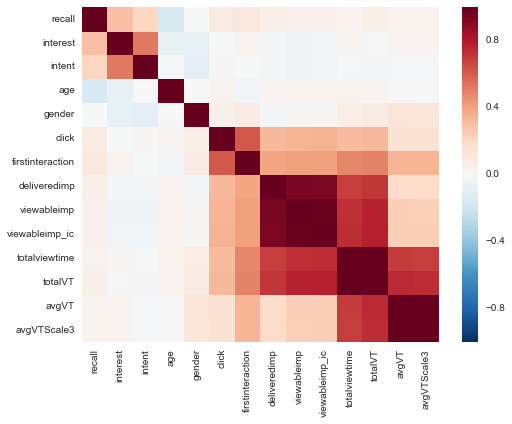

In [110]:
from pivottablejs import pivot_ui
#pivot_ui(df6)
#sns.heatmap(df6.corr())
sns.heatmap(df6[df6.columns[1:]].corr(method='spearman'))

In [111]:
df6[['avgVTScale3', 'answersetid']].corr(method='spearman')

,avgVTScale3,answersetid
avgVTScale3,1.00000,0.25589
answersetid,0.25589,1.00000


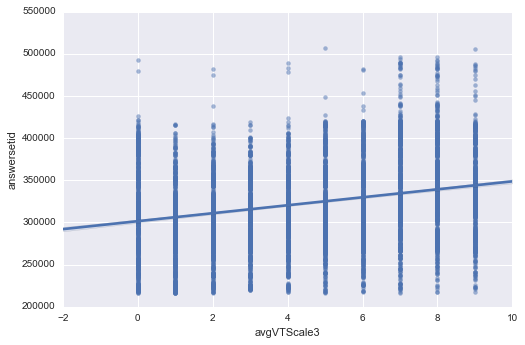

In [112]:
sns.lmplot(x='avgVTScale3', y='answersetid', data=df6, aspect=1.5,scatter_kws={'alpha':0.5} )
# the higher of answersetid the more recent the survey has been answered
# assumpiton 1: overall view time per impression has increased over the past 4 month period???
# assumption 2: the later an interview answers the campaign the more probable the person has seen it longer each time??

In [113]:
df6.avgVT.quantile(0.6)

15.261400000000002

In [114]:
scale3max=df6.groupby(['avgVTScale3'])['avgVT'].max()
scale3min=df6.groupby(['avgVTScale3'])['avgVT'].min()
scale3_range = pd.concat([scale3min, scale3max], axis=1).round(0)
scale3_range



,avgVT,avgVT
avgVTScale3,,
0,0,3
1,3,5
2,5,7
3,7,9
4,9,11
5,11,15
6,15,23
7,23,44
8,44,118


In [115]:
df6['interest_Category_Num']=sql.read_sql("select case when interest >= 4 then 10 else 0 end as interest_Category_Num from df5",cnx)


In [116]:
df6['intent_Category_Num']=sql.read_sql("select case when intent >= 4 then 10 else 0 end as intent_Category_Num from df5",cnx)
df6.head(10)

,answersetid,recall,interest,intent,age,gender,recall_category,interest_category,intent_category,age_category,gender_category,click,firstinteraction,deliveredimp,viewableimp,viewableimp_ic,totalviewtime,totalVT,avgVT,avgVTCategory,totalVTCategory,avgVTScale2,avgVTScale3,interest_Category_Num,intent_Category_Num
0,218047,1,2,5,1,0,Yes,Low,High,15-24,Female,0,0,4,3,2,9158,9.158,4.579000,4 - 6,5 - 10,3-5,1,0,10
1,218979,1,2,2,3,0,Yes,Low,Low,35-44,Female,0,0,2,1,1,1056,1.056,1.056000,0 - 2,0 - 5,1-3,0,0,0
2,219322,0,2,2,2,0,No,Low,Low,25-34,Female,0,0,1,0,0,NaN,0.000,0.000000,0 - 2,0 - 5,0-1,0,0,0
3,219343,1,3,4,1,0,Yes,Low,High,15-24,Female,0,0,1,1,1,6220,6.220,6.220000,6 - 8,5 - 10,5-7,2,0,10
4,219622,1,1,3,1,0,Yes,Low,Low,15-24,Female,0,0,4,4,2,67354,67.354,33.677000,32 - 34,65 - 70,33-35,7,0,0
5,219988,1,1,1,1,0,Yes,Low,Low,15-24,Female,0,0,1,1,0,NaN,0.000,0.000000,0 - 2,0 - 5,0-1,0,0,0
6,223345,1,3,5,4,0,Yes,Low,High,45-54,Female,0,0,8,3,3,16574,16.574,5.524667,4 - 6,15 - 20,5-7,2,0,10
7,223484,1,4,3,4,0,Yes,High,Low,45-54,Female,0,0,3,0,0,30,0.030,0.000000,0 - 2,0 - 5,0-1,0,10,0
8,223971,1,2,2,1,1,Yes,Low,Low,15-24,Male,0,0,1,1,1,27204,27.204,27.204000,26 - 28,25 - 30,27-29,7,0,0
9,224093,0,2,4,2,0,No,Low,High,25-34,Female,0,0,1,1,1,9684,9.684,9.684000,8 - 10,5 - 10,9-11,4,0,10


In [117]:
df6['totalVTScale3'] = pd.qcut(df6.totalVT,10,labels=False)
df6.sample(n=10)

,answersetid,recall,interest,intent,age,gender,recall_category,interest_category,intent_category,age_category,gender_category,click,firstinteraction,deliveredimp,viewableimp,viewableimp_ic,totalviewtime,totalVT,avgVT,avgVTCategory,totalVTCategory,avgVTScale2,avgVTScale3,interest_Category_Num,intent_Category_Num,totalVTScale3
249,224534,0,3,5,3,0,No,Low,High,35-44,Female,0,0,1,0,0,NaN,0.000,0.000000,0 - 2,0 - 5,0-1,0,0,10,0
3583,323268,1,3,5,1,0,Yes,Low,High,15-24,Female,0,0,9,6,6,35340,35.340,5.890000,4 - 6,35 - 40,5-7,2,0,10,2
5590,340350,0,1,1,1,1,No,Low,Low,15-24,Male,0,1,13,4,4,10704,10.704,2.676000,2 - 4,10 - 15,1-3,0,0,0,1
3897,301955,0,1,5,2,0,No,Low,High,25-34,Female,0,0,1,1,1,7452,7.452,7.452000,6 - 8,5 - 10,7-9,3,0,10,1
2068,286968,0,2,5,6,0,No,Low,High,65+,Female,0,0,1,1,1,71530,71.530,71.530000,70 - 72,70 - 75,above 35,8,0,10,3
6903,386500,1,3,5,2,1,Yes,Low,High,25-34,Male,0,1,20,14,13,1266520,1266.520,97.424615,96 - 98,NaN,above 35,8,0,10,8
2303,316754,1,3,1,2,1,Yes,Low,Low,25-34,Male,0,0,23,20,18,168132,168.132,9.340667,8 - 10,165 - 170,9-11,4,0,0,5
4033,297550,0,1,3,6,1,No,Low,Low,65+,Male,0,0,26,15,14,214000,214.000,15.285714,14 - 16,210 - 215,15-17,6,0,0,6
5719,344654,0,3,2,3,0,No,Low,Low,35-44,Female,0,0,2,2,2,18492,18.492,9.246000,8 - 10,15 - 20,9-11,4,0,0,2
4875,322084,1,1,1,2,1,Yes,Low,Low,25-34,Male,0,0,2,2,2,15158,15.158,7.579000,6 - 8,15 - 20,7-9,3,0,0,1


,recall,interest_Category_Num,intent_Category_Num,age,gender,firstinteraction,viewableimp_ic,totalVTScale3,avgVTScale3
recall,1.000000,0.245630,0.182037,-0.156855,-0.003949,0.028844,0.041138,0.055089,0.041760
interest_Category_Num,0.245630,1.000000,0.326191,-0.056686,-0.021124,0.017083,-0.003551,0.009889,0.022698
intent_Category_Num,0.182037,0.326191,1.000000,0.000178,-0.050112,0.006407,-0.001872,-0.020254,-0.011940
age,-0.156855,-0.056686,0.000178,1.000000,-0.012843,-0.001495,0.044648,0.028652,-0.007929
gender,-0.003949,-0.021124,-0.050112,-0.012843,1.000000,0.009368,-0.048385,0.083571,0.124890
firstinteraction,0.028844,0.017083,0.006407,-0.001495,0.009368,1.000000,0.341478,0.172775,0.118878
viewableimp_ic,0.041138,-0.003551,-0.001872,0.044648,-0.048385,0.341478,1.000000,0.498523,0.097382
totalVTScale3,0.055089,0.009889,-0.020254,0.028652,0.083571,0.172775,0.498523,1.000000,0.731761
avgVTScale3,0.041760,0.022698,-0.011940,-0.007929,0.124890,0.118878,0.097382,0.731761,1.000000


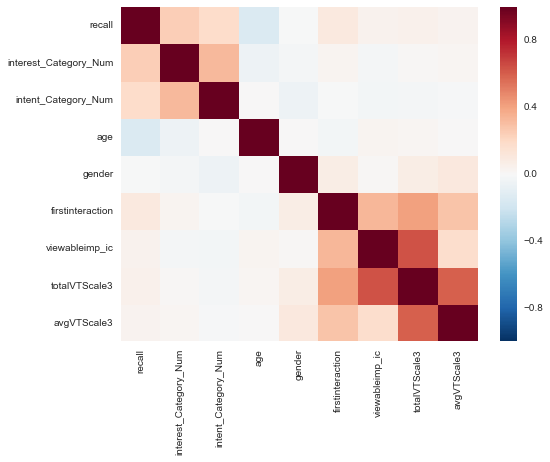

In [125]:
sns.heatmap(df6[['recall', 'interest_Category_Num', 'intent_Category_Num','age', 'gender','firstinteraction',
                 'viewableimp_ic', 'totalVTScale3','avgVTScale3']].corr(method='kendall'))
df6[['recall', 'interest_Category_Num', 'intent_Category_Num','age', 'gender','firstinteraction',
                 'viewableimp_ic', 'totalVTScale3','avgVTScale3']].corr(method='pearson')

In [119]:
from pivottablejs import pivot_ui
pivot_ui(df6)

In [ ]:

df7 = df6[['recall', 'interest_Category_Num', 'intent_Category_Num','age', 'gender','firstinteraction','viewableimp_ic', 'totalVTScale3',
'avgVTScale3']][(df6.totalVTScale3 < df6.totalVTScale3.quantile(1)) & (df6.totalVTScale3 > df6.totalVTScale3.quantile(.30))].copy()

In [ ]:
sns.heatmap(df7.corr())

In [650]:
df6.head(1)

,answersetid,recall,interest,intent,age,gender,recall_category,interest_category,intent_category,age_category,gender_category,click,firstinteraction,deliveredimp,viewableimp,viewableimp_ic,totalviewtime,totalVT
0,218047,1,2,5,1,0,Yes,Low,High,15-24,Female,0,0,4,3,2,9158,9.158
